Importing libraries:
matplotlib & numpy

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

Importing dataset from sklearn and load the dataset (same dataset to compairing_digits)

In [19]:
from sklearn import datasets
digits = datasets.load_digits()

Load_digits contains 64 features and 1797 sample data.

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [40]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [41]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

1797 images that gives in 8 * 8 pixels (64 pixels) basically its in a 3D array that is in 8*8 pixels

In [42]:
digits.images.shape

(1797, 8, 8)

An 8*8 image which the array corresponds to the pixel, the 0 represents a black pixel and the higher the number the less black on the pixel. You can see the text compare to the image.

In [45]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


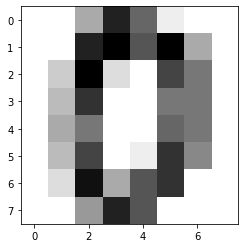

In [46]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

Testing the target attribute which is in a 1D array that contains 1797 slots.

In [47]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


Print out digits which the neural network can use due to the low resolution and the low quality of imput images.

In [9]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

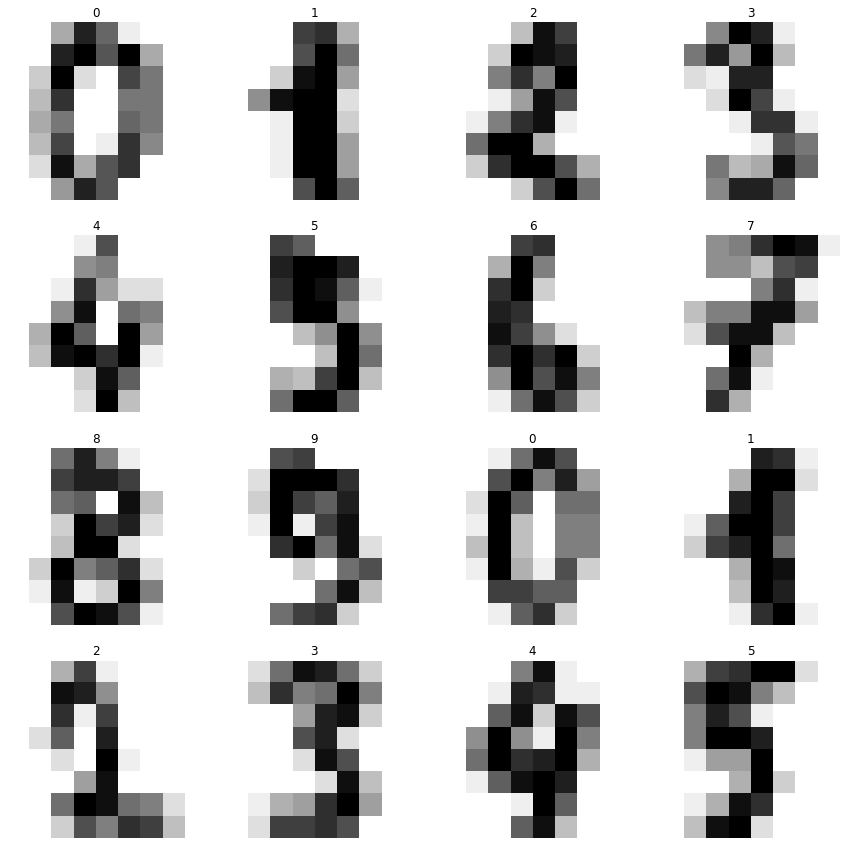

In [10]:
plot_multi(0)

Data processing - Basically the input layer requires 1D array for the in put, however the images are in a 2D array we need to flattern the images.

In [11]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

With the 1797 images flatterned, the 2D 8*8 image has been flattern into a 1D with the 8 pixels becoming a 1D array with a 8*8.

In [12]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Splitting out data into training and testing samples, which the first 1000 images will be for training and the rest will be used for testing the performance of the neural network.

In [13]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The neural network model will require one hidden layer that comprised of 15 neurons, Sklearn has a feature to caculate how many numbers to use as for input and output layers.

hidden_layers_size=(15,) are the hidden layers,
activation='logistic' are the activation of the function for the hidden_layer which 'logisitics' are sigmoid functions that returns the sigmoid activation function (which also used in logistic regression classification algorithm) works by:
- 1.0 / (1.0 + e^-x) [the e is mathematical constrant which is based on natural logariithm.]

In [14]:
from sklearn.neural_network import MLPClassifier # Neural Networks 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

Training the neural network

In [15]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

Testing the first 50 test samples.

In [16]:
predictions = mlp.predict(x_test)
predictions[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [17]:
y_test[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

First 50 test samples, looks similar, however most predictions are matched with true labels.

& the accuracy is printed out

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9146800501882058

Thanks to Sklearn to makes this simplistics neural network to understand how it can be used and processing the data.